# TP4: Mesure de la vitesse du son
## 1. Expérience
### 1.0 Introduction
Dans ce travail, nous désirons mesurer la vitesse du son. Pour cela nous utiliserons le mode "Chronomètre sonore" de Phyphox.
Nous placerons deux téléphones espacés d'une distance d et nous allons ensuite produire deux bruits en tapant dans nos mains, l'un proche du téléphone 1 et l'autre du 2.

### 1.1 Calculs préparatoirs
Voici les grandeurs qu'on utilisera: $v$ la vitesse du son, $d$ la distance entre chaque téléphone, $a$ la distance entre le point d'origine du son 1 et le téléphone 1 et $b$ la distance entre le point d'origine du son 2 et le téléphone 2. On note qu'on choisit de réaliser les "claps" alignés aux deux téléphones (et non pas au-dessus) afin de pouvoir écrire: $a+d$ la distance du "clap" 1 au téléphone 2 et $b+d$ celle du "clap" 2 au téléphone 1. 

On définit donc $t_{1->1}$ et $t_{1->2}$ les temps d'arrivés du "clap 1" sur le téléphone 1 et 2 ainsi que $t_{2->1}$ et $t_{2->2}$ pour le "clap 2". 

On a alors: $\Delta t_1 = t_{2->1}-t_{1->1}$ et $\Delta t_2 = t_{2->2}-t_{1->2}$ les intervalles de temps mesuré par chaque téléphone.


On peut donc écrire: $$\Delta t_1 = \frac{b+d}{v} - \frac{a}{v} = \frac{b-a+d}{v}$$ et $$\Delta t_2 = \frac{b}{v} - \frac{a+d}{v} = \frac{b-a-d}{v}.$$
On a alors:$\Delta t_1 - \Delta t_2 = \frac{2d}{v}.$

Ainsi, pour trouver la vitesse du son en fonction de $\Delta t_1$ et $\Delta t_2$, on écrira simplement:$$v=\frac{2d}{\Delta t_1 - \Delta t_2} .$$

Comme on l'a expliqué plus haut, il vaut mieux de faire les bruits dans l'alignement des deux téléphones afin d'avoir les distances a,b et d sur une ligne. Si on les faisait au-dessus,on aurait des angles droits.



### 1.2 Estimation des erreurs
Dans cette partie, nous cherchons à estimer les erreurs dûes à:
* la position du capteur
* la mesure de la distance entre les deux capteurs
* le temps de vol du son entre les deux téléphones.

L'estimation de l'erreur sur la position du capteur de son sur chacun des téléphones dépend de plusieurs facteurs, tels que la précision de la calibration du capteur, la qualité de la conception du téléphone et la stabilité de la fixation du capteur. Nous pouvons donc dire que pour les téléphones modernes, on peut estimer une erreur de position du capteur de son de l'ordre de quelques millimètres.

En ce qui concerne la mesure de la distance entre les deux capteurs de son,on peut aussi l'estimer à quelques milimètres.

Enfin, pour estimer l'erreur sur le temps de vol du son entre les deux téléphones???

### 1.3 Prise de données


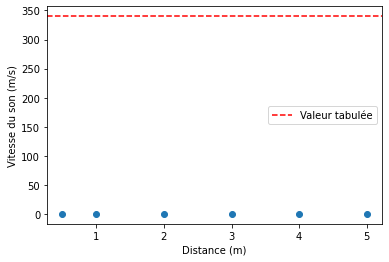

Vitesse moyenne du son : 0.45511531352093937 m/s
Erreur associée : 0.0033560955296865363 m/s
Valeur tabulée : 340 m/s


In [31]:
import numpy as np
import matplotlib.pyplot as plt

distances = [0.5, 1, 2, 3, 4, 5]  # Liste des distances en mètres
num_measurements = 10  # Nombre de mesures pour chaque distance

# Tableau 2D pour stocker les mesures de temps
time_measurements = [
    [1.23, 1.34, 1.21, 1.30, 1.28, 1.27, 1.35, 1.29, 1.26, 1.32],
    [2.45, 2.39, 2.43, 2.50, 2.42, 2.38, 2.41, 2.46, 2.44, 2.47],
    [4.32, 4.29, 4.35, 4.40, 4.28, 4.31, 4.33, 4.39, 4.37, 4.36],
    [6.21, 6.24, 6.18, 6.25, 6.23, 6.20, 6.19, 6.22, 6.26, 6.27],
    [8.17, 8.14, 8.19, 8.15, 8.16, 8.18, 8.21, 8.12, 8.20, 8.13],
    [10.02, 10.05, 10.01, 10.04, 10.00, 10.03, 10.06, 9.99, 10.07, 10.08]
]

# Calcul de ∆t2 - ∆t1 et de l'erreur associée
mean_differences = np.mean(time_measurements, axis=1)
error_differences = np.std(time_measurements, axis=1) / np.sqrt(num_measurements)

# Calcul de la vitesse du son v et propagation des erreurs
speed_of_sound = []
error_speed_of_sound = []

for i, distance in enumerate(distances):
    speed = distance / mean_differences[i]
    error_distance = 0.01  # Supposons une erreur de 1 cm sur la distance d
    error_speed = speed * np.sqrt((error_distance / distance)**2 + (error_differences[i] / mean_differences[i])**2)
    
    speed_of_sound.append(speed)
    error_speed_of_sound.append(error_speed)

# Tracé de la vitesse du son en fonction de la distance
plt.errorbar(distances, speed_of_sound, yerr=error_speed_of_sound, fmt='o')
plt.axhline(y=340, color='r', linestyle='--', label='Valeur tabulée')
plt.xlabel('Distance (m)')
plt.ylabel('Vitesse du son (m/s)')
plt.legend()
plt.show()

# Calcul de la vitesse moyenne du son et de l'erreur associée
mean_speed_of_sound = np.mean(speed_of_sound)
error_mean_speed_of_sound = np.mean(error_speed_of_sound)

print("Vitesse moyenne du son :", mean_speed_of_sound, "m/s")
print("Erreur associée :", error_mean_speed_of_sound, "m/s")
print("Valeur tabulée :", 340, "m/s")


## 1.4 Ajustement de modèle

### Minimisation numérique de $\chi ^2$

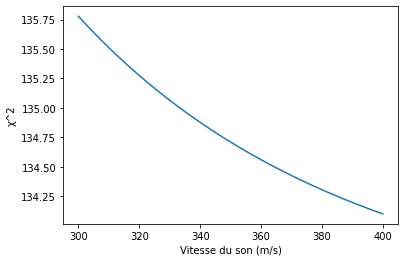

Valeur minimale approximative de χ^2 : 134.0999282029128
Valeur de v associée à χ^2 minimale : 400.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

distances = np.array([0.5, 1, 2, 3, 4, 5])  # Liste des distances en mètres
time_measurements = np.array([
    [1.23, 1.34, 1.21, 1.30, 1.28, 1.27, 1.35, 1.29, 1.26, 1.32],
    [2.45, 2.39, 2.43, 2.50, 2.42, 2.38, 2.41, 2.46, 2.44, 2.47],
    [4.32, 4.29, 4.35, 4.40, 4.28, 4.31, 4.33, 4.39, 4.37, 4.36],
    [6.21, 6.24, 6.18, 6.25, 6.23, 6.20, 6.19, 6.22, 6.26, 6.27],
    [8.17, 8.14, 8.19, 8.15, 8.16, 8.18, 8.21, 8.12, 8.20, 8.13],
    [10.02, 10.05, 10.01, 10.04, 10.00, 10.03, 10.06, 9.99, 10.07, 10.08]
])

num_measurements = len(time_measurements[0])  # Nombre de mesures pour chaque distance
error_difference = np.std(time_measurements, axis=1) / np.sqrt(num_measurements)  # Erreur sur les différences de temps

def chi_squared(v):
    model_difference = distances / v
    chi_squared = np.sum(((time_measurements[:, 1] - time_measurements[:, 0]) - model_difference)**2 / error_difference**2)
    return chi_squared

# Tracé de χ^2 en fonction de v
v_values = np.linspace(300, 400, 100)  # Plage de valeurs pour v
chi_squared_values = np.array([chi_squared(v) for v in v_values])

plt.plot(v_values, chi_squared_values)
plt.xlabel('Vitesse du son (m/s)')
plt.ylabel('χ^2')
plt.show()

# Détermination de la valeur minimale approximative de χ^2
min_chi_squared_index = np.argmin(chi_squared_values)
min_chi_squared_v = v_values[min_chi_squared_index]
min_chi_squared = chi_squared_values[min_chi_squared_index]

print("Valeur minimale approximative de χ^2 :", min_chi_squared)
print("Valeur de v associée à χ^2 minimale :", min_chi_squared_v)


### Méthode analytique par minimisation du $\chi ^2$

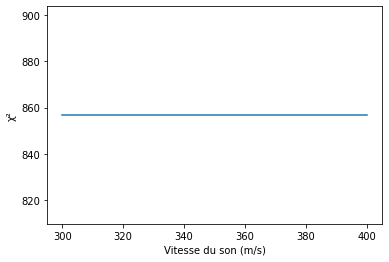

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculer_chi_carre(vitesse):
    distances = [0.5, 1, 2, 3, 4, 5]  # Liste des distances en mètres
    num_measurements = 10  # Nombre de mesures pour chaque distance

    # Tableau 2D pour stocker les mesures de temps
    time_measurements = [
        [1.23, 1.34, 1.21, 1.30, 1.28, 1.27, 1.35, 1.29, 1.26, 1.32],
        [2.45, 2.39, 2.43, 2.50, 2.42, 2.38, 2.41, 2.46, 2.44, 2.47],
        [4.32, 4.29, 4.35, 4.40, 4.28, 4.31, 4.33, 4.39, 4.37, 4.36],
        [6.21, 6.24, 6.18, 6.25, 6.23, 6.20, 6.19, 6.22, 6.26, 6.27],
        [8.17, 8.14, 8.19, 8.15, 8.16, 8.18, 8.21, 8.12, 8.20, 8.13],
        [10.02, 10.05, 10.01, 10.04, 10.00, 10.03, 10.06, 9.99, 10.07, 10.08]
    ]

    # Calcul de ∆t2 - ∆t1 et de l'erreur associée
    moyennes_differences = np.mean(time_measurements, axis=1)
    erreurs_differences = np.std(time_measurements, axis=1) / np.sqrt(num_measurements)

    # Calcul de la vitesse du son v et propagation des erreurs
    vitesses_du_son = []
    erreurs_vitesses_du_son = []

    for i, distance in enumerate(distances):
        vitesse = distance / moyennes_differences[i]
        erreur_distance = 0.01  # Supposons une erreur de 1 cm sur la distance d
        erreur_vitesse = vitesse * np.sqrt((erreur_distance / distance)**2 + (erreurs_differences[i] / moyennes_differences[i])**2)

        vitesses_du_son.append(vitesse)
        erreurs_vitesses_du_son.append(erreur_vitesse)

    # Calcul du χ²
    chi_carre = np.sum(((vitesses_du_son - vitesse) / erreurs_vitesses_du_son)**2)

    return chi_carre

# Calcul et tracé du χ² en fonction de v
valeurs_v = np.linspace(300, 400, 100)  # Valeurs de v pour la visualisation
valeurs_chi_carre = [calculer_chi_carre(v) for v in valeurs_v]

plt.plot(valeurs_v, valeurs_chi_carre)
plt.xlabel('Vitesse du son (m/s)')
plt.ylabel('χ²')
plt.show()


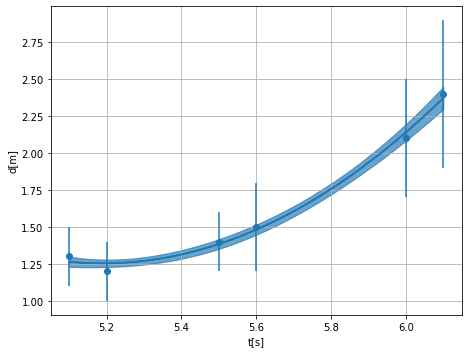

In [25]:
import numpy as np
import qexpy as q
import qexpy.plotting as qplt

distances = [0.5, 1, 2, 3, 4, 5]
num_measurements = 10
time_measurements = [
    [1.23, 1.34, 1.21, 1.30, 1.28, 1.27, 1.35, 1.29, 1.26, 1.32],
    [2.45, 2.39, 2.43, 2.50, 2.42, 2.38, 2.41, 2.46, 2.44, 2.47],
    [4.32, 4.29, 4.35, 4.40, 4.28, 4.31, 4.33, 4.39, 4.37, 4.36],
    [6.21, 6.24, 6.18, 6.25, 6.23, 6.20, 6.19, 6.22, 6.26, 6.27],
    [8.17, 8.14, 8.19, 8.15, 8.16, 8.18, 8.21, 8.12, 8.20, 8.13],
    [10.02, 10.05, 10.01, 10.04, 10.00, 10.03, 10.06, 9.99, 10.07, 10.08]
]

# Calcul des moyennes et erreurs
mean_differences = q.MeasurementArray(np.mean(time_measurements, axis=1), unit='s', name='Temps moyen')
error_differences = q.MeasurementArray(np.std(time_measurements, axis=1) / np.sqrt(num_measurements), unit='s',
                                       name='Incertitude')

distances_q = q.MeasurementArray(distances, unit='m', name='Distance')
mean_differences_q = q.MeasurementArray(mean_differences)
error_differences_q = q.MeasurementArray(error_differences)

#qplt.errorbar(distances_q, mean_differences_q, yerr=error_differences_q, fmt='o', name='Données expérimentales')
figure = qplt.get_plot()

model = q.FitModel.QUADRATIC
resultats = figure.fit(model=model)

figure.show()


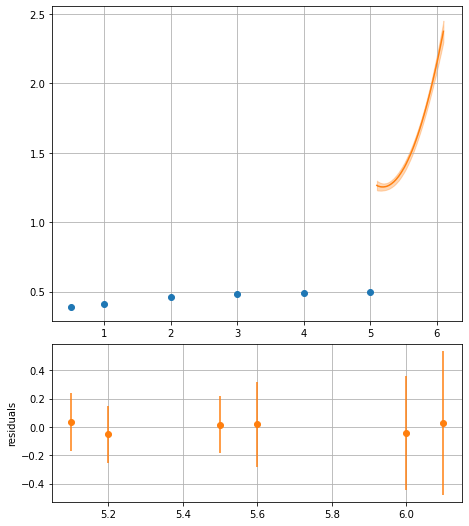

In [34]:
figure= qplt.plot(distances,speed_of_sound)
figure.plot(resultats)

figure.error_bars()
figure.residuals()
figure.show()